In [1]:

import numpy as np
import scipy
from scipy.io import loadmat

import matplotlib.pyplot as plt
import matplotlib.cm as cm
params = {'ytick.color' : 'w',
          'xtick.color' : 'w',
          'axes.labelcolor' : 'w',
          'axes.edgecolor' : 'w'}
plt.rcParams.update(params)

import matplotlib.animation as animation
%matplotlib inline



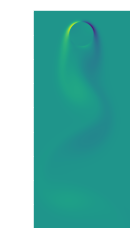

In [2]:
results = loadmat('ALL.mat')

m = int(results['m'][0][0])
n = int(results['n'][0][0])
v = results['VALL'][:, 0].reshape((n, m))
u = results['UALL'][:, 0].reshape((n, m))
vort = results['VORTALL'][:, 0].reshape((n, m))
tsteps = results['VORTALL'].shape[1]

fig = plt.figure()
plt.imshow(vort)
plt.show()


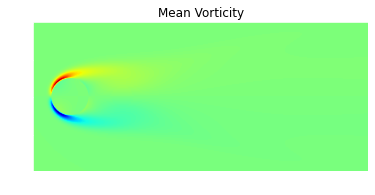

In [10]:
## POD
X = results['VORTALL']
Y = np.concatenate((X, X), axis=1)

for k in range(X.shape[1]):
    xflip = (np.flipud(X[:, k].reshape((m, n), order='F'))).reshape((m*n,), order='F')
    Y[:, k+X.shape[1]] = -xflip

Yavg = np.mean(Y, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(Yavg.reshape((m, n), order='F'), cmap='jet')
ax.set_title('Mean Vorticity')
plt.show()


In [11]:
Y.shape

(89351, 302)

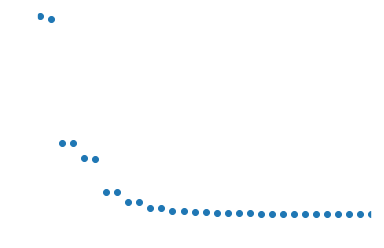

In [12]:
[U, S, V] = np.linalg.svd(Y-Yavg.reshape(-1, 1) * np.ones((1, Y.shape[1])), full_matrices=False)

sv=S/sum(S)
plt.plot(sv,'o')
plt.xlim(-0.3, 30)
plt.show()

vmodes = 9
VS = np.zeros((Y.shape[1], vmodes))
for k in range(vmodes):
   VS[:, k] = S[k] * V[k, :] 



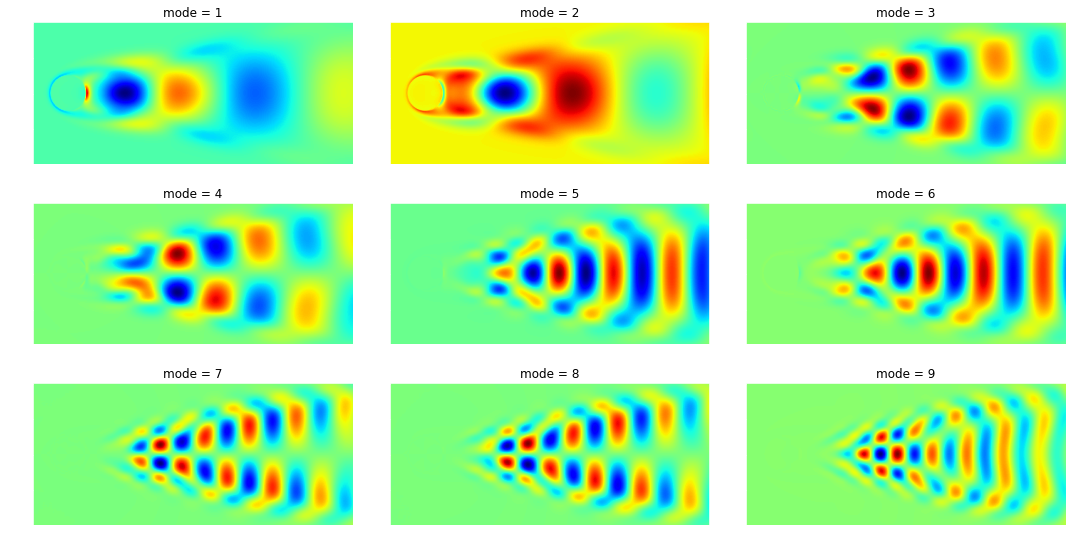

In [13]:
fig = plt.figure(figsize=(15, 10))

for k in range(9):
    uplot = U[:, k].reshape((m, n), order='F')
    ax = fig.add_subplot(4, 3, k+1)
    ax.imshow(uplot, cmap='jet')
    ax.set_title('mode = %d'%(k+1))
plt.tight_layout()
plt.show()

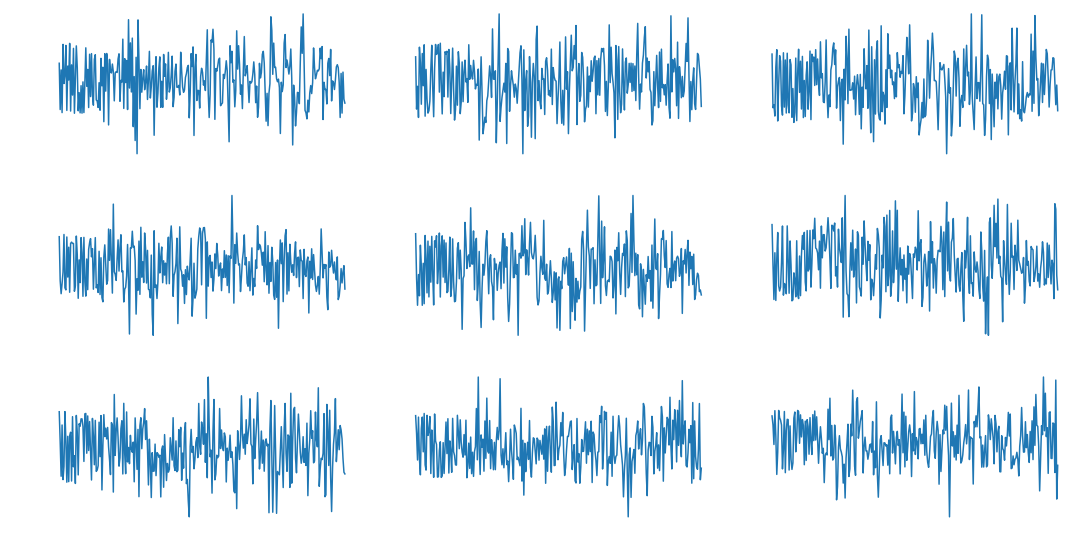

In [14]:
fig = plt.figure(figsize=(15, 10))

for k in range(9):
    vplot = V[:, k]
    ax = fig.add_subplot(4, 3, k+1)
    ax.plot(vplot)
plt.tight_layout()
plt.show()


In [15]:
## Low-rank reconstructions

VortRtotal = np.zeros((m*n, Y.shape[1]))
for k in range(9):
    VortR = np.outer(U[:, k], VS[:, k].T)
    VortRtotal = VortRtotal + VortR


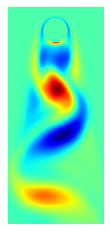

In [16]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(VortRtotal[:, 0].reshape((n, m)), cmap='jet')
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# update the frames based on the parameter i
def animate(i):
    vort = VortRtotal[:, i].reshape((n, m))
    im.set_array(vort)
    return [im]

# run the animation
animation = FuncAnimation(fig, animate, frames=tsteps, interval=20)
HTML(animation.to_jshtml())
